In [1]:
import time

from sklearn.linear_model import RidgeClassifier

from preprocess import Preprocessing, PATH
from evaluation import get_results, get_cross_validation_scores

/Users/torokpeter/Documents/tuw/first/machine_learning/machinelearning-tuw/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


The model fit took 0.0017 seconds
10-Fold CV Scores: [0.84630893 0.85832893 0.8334174  0.83162612 0.84623139 0.8334174
 0.87179487 0.83213138 0.80519481 0.87012987]
Average f1_weighted Score: 0.8429
Standard Deviation: 0.0192
              precision    recall  f1-score   support

           1       0.84      0.85      0.84        78
           2       0.84      0.81      0.82        75
           3       0.98      1.00      0.99        42

    accuracy                           0.87       195
   macro avg       0.88      0.89      0.88       195
weighted avg       0.87      0.87      0.87       195



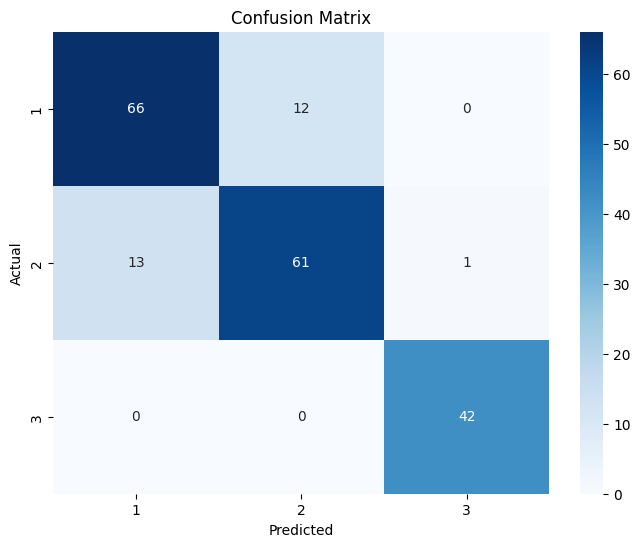

In [3]:
def ridge_pipeline():
    """
    Ridge classifier pipeline

    Loads data, fits ridge classifier, tests relevant metrics
    """
    pp = Preprocessing()
    X_train, X_test, y_train, y_test = pp.pipeline(PATH, split=True, scale=True, encode_labels=False)
    ridge_model = RidgeClassifier(random_state=42)

    t0 = time.time()
    ridge_model.fit(X_train, y_train)
    t1 = time.time()

    print(f'The model fit took {t1-t0:.4f} seconds')
    y_pred = ridge_model.predict(X_test)

    get_cross_validation_scores(ridge_model, X_train, y_train)
    get_results(y_test, y_pred, pp.labels)

ridge_pipeline()